In [4]:
#a) Conduct exploratory data analysis
import pandas as pd
df = pd.read_csv('/content/Breast_Cancer.csv')
print(df.head())
print(df.isnull().sum())
print(df.describe())
if 'diagnosis' in df.columns:
  print(df['diagnosis'].value_counts())

   Age   Race Marital Status T Stage  N Stage 6th Stage  \
0   68  White        Married       T1      N1       IIA   
1   50  White        Married       T2      N2      IIIA   
2   58  White       Divorced       T3      N3      IIIC   
3   58  White        Married       T1      N1       IIA   
4   47  White        Married       T2      N1       IIB   

               differentiate Grade   A Stage  Tumor Size Estrogen Status  \
0      Poorly differentiated     3  Regional           4        Positive   
1  Moderately differentiated     2  Regional          35        Positive   
2  Moderately differentiated     2  Regional          63        Positive   
3      Poorly differentiated     3  Regional          18        Positive   
4      Poorly differentiated     3  Regional          41        Positive   

  Progesterone Status  Regional Node Examined  Reginol Node Positive  \
0            Positive                      24                      1   
1            Positive                      1

visualization



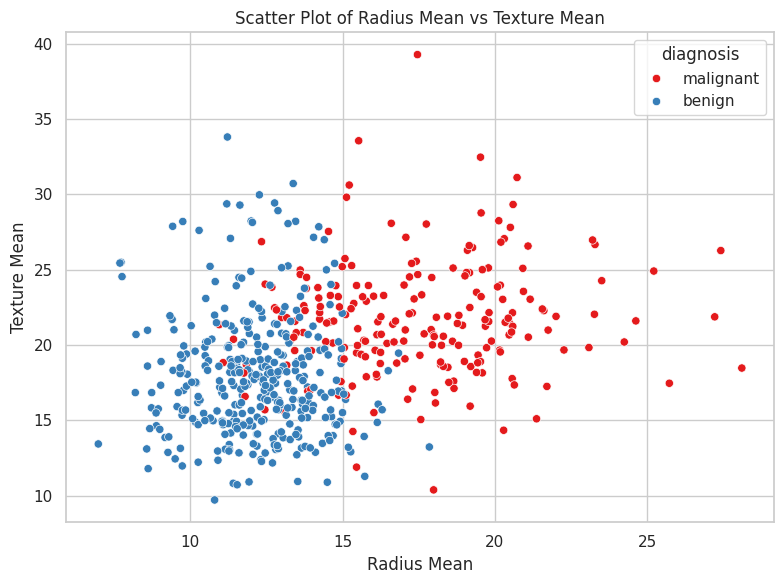

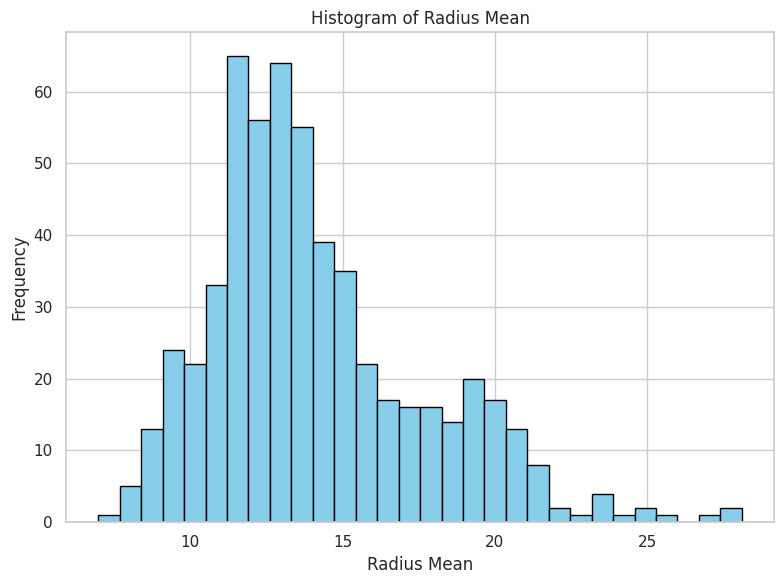

/tmp/ipython-input-2847200945.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y='radius_mean', data=df, palette='Set2')


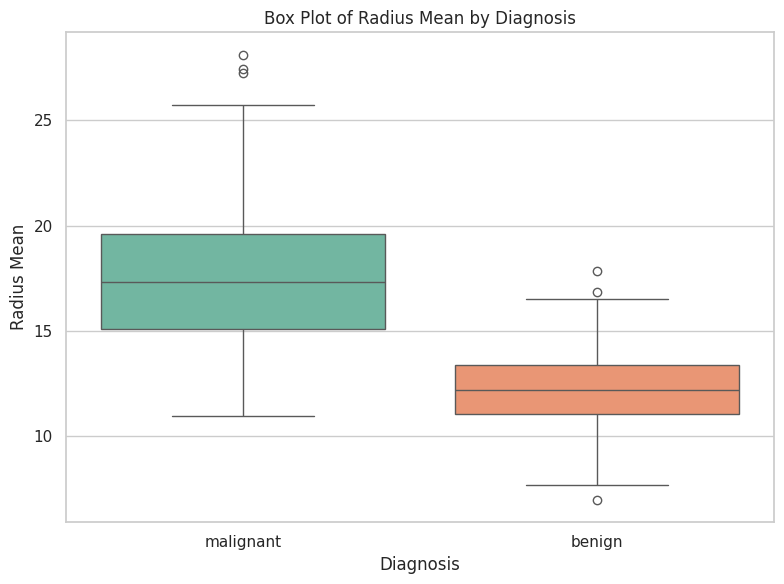

In [9]:


import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_breast_cancer

# Load breast cancer dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['diagnosis'] = pd.Series(data.target).map({0: 'malignant', 1: 'benign'})

# Rename columns for easier access
df.rename(columns={
    'mean radius': 'radius_mean',
    'mean texture': 'texture_mean'
}, inplace=True)

# Set seaborn style
sns.set(style="whitegrid")

# 1. Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='radius_mean', y='texture_mean', hue='diagnosis', data=df, palette='Set1')
plt.title("Scatter Plot of Radius Mean vs Texture Mean")
plt.xlabel("Radius Mean")
plt.ylabel("Texture Mean")
plt.tight_layout()
plt.show()

# 2. Histogram
plt.figure(figsize=(8, 6))
df['radius_mean'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title("Histogram of Radius Mean")
plt.xlabel("Radius Mean")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# 3. Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='diagnosis', y='radius_mean', data=df, palette='Set2')
plt.title("Box Plot of Radius Mean by Diagnosis")
plt.xlabel("Diagnosis")
plt.ylabel("Radius Mean")
plt.tight_layout()
plt.show()


In [10]:
#(c): Implementing Naïve Bayes Classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score

df_cleaned = df.dropna()

X = df_cleaned.drop(['diagnosis'], axis=1)
y = df_cleaned['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Classification Report:
               precision    recall  f1-score   support

      benign       0.96      1.00      0.98        71
   malignant       1.00      0.93      0.96        43

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Accuracy: 0.9737
